In [4]:
# OLD  https://github.com/whimian/SVM-Image-Classification
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pylab as pl

# Loading .csv file
df = pd.read_csv ('/Users/jonasvejlgardkristensen/Documents/Datasets/FeatureData/features_example.csv')

[UPDATE] Data has been loaded successfully!
[UPDATE] GridSearch initiated....
[UPDATE] GridSearch initiated....
[UPDATE] Training model....
[UPDATE] Best hyperparameters found in gridsearch:  {'n_estimators': 48}
[UPDATE] Printing Results
------------------ Confusion Matrix -------------------
[[102   1]
 [  2  95]]
 
-------------- Cross-validated accuracy ---------------
[0.975  0.9875 0.9925 0.9875 0.9775]
Accuracy: 0.98 (+/- 0.01)
 
---------------- Classification report ----------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       103
           1       0.99      0.98      0.98        97

   micro avg       0.98      0.98      0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

 
--------------------- AUC score -----------------------
0.9848363527174457
[UPDATE] Plotting descision # 1 trees....
[UPDATE] Plotting descision # 2 trees....
[UPDATE] Plotti

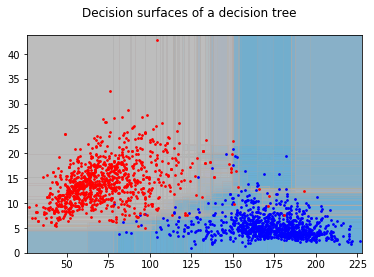

In [5]:
#Expected format: svmClassification([Dataframe = feature1, feature2, label], [getResult='yes' or 'no'], [getPlot='yes' or 'no'], [testSize = 0:1] )
RFclassification(df, getResult = 'yes', getPlot = 'yes', testSize = 0.1)

In [2]:
def RFclassification(df, getResult, getPlot, testSize):
    # Assigning data
    X = df.drop('label', axis=1)  
    y = df['label'] 

    # Splitting the data in to training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state=10)
    print('[UPDATE] Data has been loaded successfully!')

    # Create Random Forest classifier 
    print('[UPDATE] GridSearch initiated....')
    param_grid = [{'n_estimators': [2, 4, 6, 12, 24, 48, 96, 192]}]
    
    # Calling the Support Vector Classifier function
    RandomForest=RandomForestClassifier()

    # Discovering the optimum in the parameter grid
    print('[UPDATE] GridSearch initiated....')
    RFclassifier = GridSearchCV(RandomForest, param_grid, cv = 3)

    # Training the model using the discovered SVC function with the discovered parameters
    print('[UPDATE] Training model....')
    RFclassifier.fit(X_train,y_train)
    
    print('[UPDATE] Best hyperparameters found in gridsearch: ', RFclassifier.best_params_)

    # Making Prediction
    y_pred=RFclassifier.predict(X_test)
    
    if getResult == 'yes': # Print results 
        print('[UPDATE] Printing Results')
        print('------------------ Confusion Matrix -------------------')
        print(confusion_matrix(y_test,y_pred))
        print(' ')
        print('-------------- Cross-validated accuracy ---------------')
        # !!! COMMENT CROSS_VAL_SCORE FOR FASTER COMPUTATION !!!
        scores = cross_val_score(RFclassifier, X, y, cv=5)
        print(scores)
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        print(' ')
        print('---------------- Classification report ----------------')
        print(classification_report(y_test,y_pred))
        print(' ')
        print('--------------------- AUC score -----------------------')
        print(roc_auc_score(y_test, y_pred))
    elif getResult == 'no':
        print('[UPDATE] Results not requested')
    else:
        print('[UPDATE] !!!THE REQUEST FOR RESULTS WAS INVALID!!!!')
    
    
    if getPlot == 'yes': # Plot decision trees in forest 
        n_classes = 2
        plot_colors = "bry"
        n_estimators = 6
        plot_step = 0.02
        pl.set_cmap(pl.cm.tab20c)
        plot_idx = 1
        pl.subplot(1, 1, plot_idx)

        x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
        y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step))
        count = 1

        for tree in RFclassifier.best_estimator_:
            print('[UPDATE] Plotting descision #',count,'trees....')
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = pl.contourf(xx, yy, Z, alpha=0.1)
            count +=1
        pl.axis("tight")

        for i, c in zip(range(n_classes), plot_colors):
            print('[UPDATE] Plotting data points....')
            idx = np.where(y == i)
            pl.scatter(X.values[idx, 0], X.values[idx, 1], c=c, label=y[i], s = 3)
            pl.axis("tight")
            plot_idx += 1

        pl.suptitle("Decision surfaces of a decision tree")
        pl.show() 
    elif getResult == 'no':
        print('[UPDATE] Plot not requested')
    else:
        print('[UPDATE] !!!THE REQUEST FOR PLOT WAS INVALID!!!!')